## Brain tumor MRI analysis

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers,preprocessing
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading images

main_dir='./Brain-Tumor-Classification-DataSet-master/'
classification_dir=[('no_tumor',),('meningioma_tumor',)]
resolution=64

def load_images(root_dir_name):
    X=[]
    y=[]
    
    for label, sub_dir_names in enumerate(classification_dir):
        for sub_dir_name in sub_dir_names:
            print (f'loading {root_dir_name} {sub_dir_name}')
            sub_dir_path=os.path.join(main_dir, root_dir_name, sub_dir_name)
            
            for image_name in os.listdir(sub_dir_path):
                image_path=os.path.join(sub_dir_path, image_name)
                image= preprocessing.image.load_img(image_path,
                                                   color_mode='grayscale',
                                                   target_size=(resolution,resolution))# 64*64
                X.append(preprocessing.image.img_to_array(image))
                y.append(label)
                
    X=np.array(X)/255.0
    y=np.array(y)
    
    return X, y

In [3]:
#training
X_train, y_train =load_images('Training')
X_test, y_test=load_images('Testing')

loading Training no_tumor


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: './Brain-Tumor-Classification-DataSet-master/Training\\no_tumor'

In [20]:
X_train.shape, X_test.shape

((1217, 64, 64, 1), (220, 64, 64, 1))

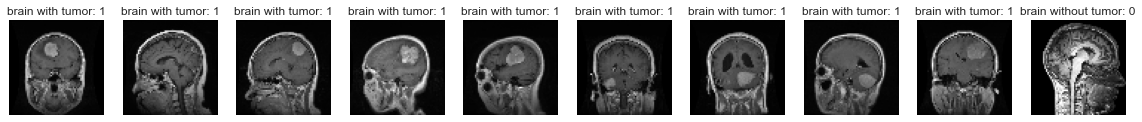

In [21]:
#Visualizing Brain tumors
c=10

fig, subplots= plt.subplots(1,c)
fig.set_size_inches(20,5)
for i in range(c):
    n= np.random.randint(0, len(X_train))
    num = y_train[n]
    word= 'out' if num==0 else""
    
    subplots[i].imshow(X_train[n].reshape((resolution, resolution)),
                      cmap='gray')
    subplots[i].set_title(f'brain with{word} tumor: {num}')
    subplots[i].axis('off')
plt.show()

In [22]:
#Building a Convolutional neural network
input_shape=(64,64,1)
model=models.Sequential()
model.add(Conv2D(32, kernel_size=(2,2),strides=(1,1),
                 activation='linear', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512, kernel_size=(2,2),strides=(1,1),
                 activation='linear'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 63, 63, 32)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 256)        

In [23]:
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics=['accuracy'])

In [24]:
train_history=model.fit(X_train,y_train, batch_size=5, epochs=10, 
          validation_data=(X_test,y_test))

Epoch 1/10
244/244 [==============================] - 7s 27ms/step - loss: 0.5535 - accuracy: 0.7362 - val_loss: 0.9363 - val_accuracy: 0.6409
Epoch 2/10
244/244 [==============================] - 7s 28ms/step - loss: 0.3814 - accuracy: 0.8316 - val_loss: 0.3984 - val_accuracy: 0.8545
Epoch 3/10
244/244 [==============================] - 7s 29ms/step - loss: 0.2359 - accuracy: 0.9014 - val_loss: 0.2511 - val_accuracy: 0.9318
Epoch 4/10
244/244 [==============================] - 7s 29ms/step - loss: 0.1742 - accuracy: 0.9343 - val_loss: 0.1968 - val_accuracy: 0.9318
Epoch 5/10
244/244 [==============================] - 7s 30ms/step - loss: 0.0883 - accuracy: 0.9680 - val_loss: 0.0794 - val_accuracy: 0.9727
Epoch 6/10
244/244 [==============================] - 7s 30ms/step - loss: 0.0603 - accuracy: 0.9852 - val_loss: 0.1451 - val_accuracy: 0.9455
Epoch 7/10
244/244 [==============================] - 7s 30ms/step - loss: 0.0746 - accuracy: 0.9819 - val_loss: 0.0727 - val_accuracy: 0.9727

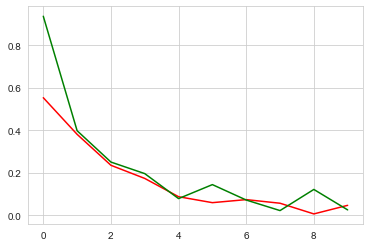

In [25]:
plt.plot(train_history.history['loss'],'r')
plt.plot(train_history.history['val_loss'],'g')

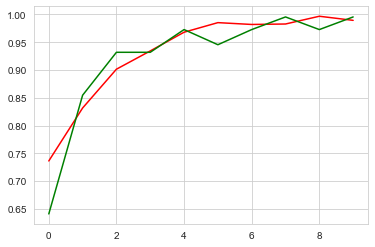

In [26]:
plt.plot(train_history.history['accuracy'],'r')
plt.plot(train_history.history['val_accuracy'],'g')

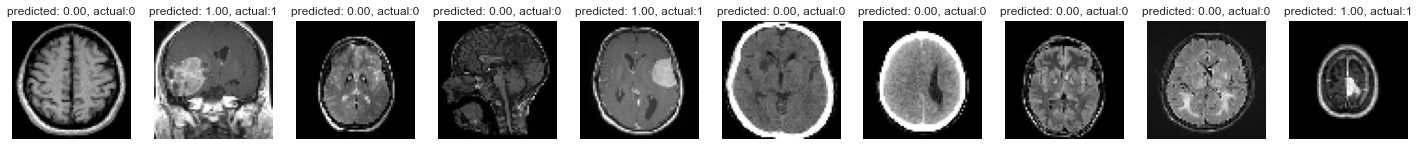

In [27]:
#Testing the model
y_test_results= model.predict([X_test])

c=10
fig, subplots=plt.subplots(1,c)
fig.set_size_inches(25,6)
for i in range(c):
    n=np.random.randint(0, len(X_test))
    guess =str(round(y_test_results[n][0], 2)).ljust(4, '0')
    actual = y_test[n]
    
    subplot=subplots[i]
    subplot.imshow(X_test[n].reshape((resolution,resolution)), cmap='gray')
    subplot.set_title(f'predicted: {guess}, actual:{actual}')
    subplot.axis('off')
plt.show()

In [33]:
score = model.evaluate(X_test, y_test, verbose = 0)
score[1]

0.9954545497894287